In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aapl = pdr.get_data_yahoo('AAPL','20190101')

In [4]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.582367
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,140.085220
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,146.065353
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.740265
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.518509


In [5]:
#Moving averages technical analysis
#it could be mean, std, etc
aapl['21-day'] = aapl.Close.rolling(21).mean()
aapl['63-day'] = aapl.Close.rolling(63).mean()
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,21-day,63-day
Date,,,,,,,,
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400.0,293.649994,276.525710,257.848412
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,300.350006,278.249044,259.140317
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,297.429993,280.057614,260.356348
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988,281.869995,261.511745
2020-01-07,300.890015,297.480011,299.839996,298.390015,24485320.0,298.390015,283.432377,262.643968


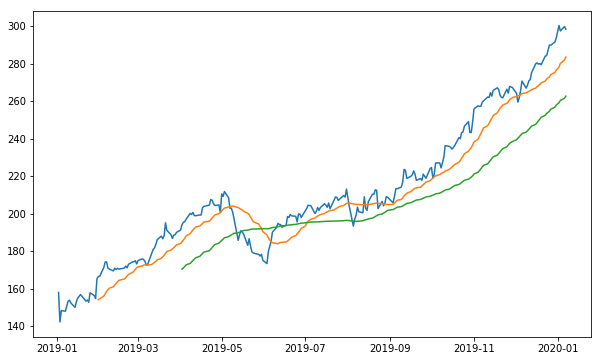

In [6]:
plt.rcParams["figure.figsize"]=(10,6)
plt.plot(aapl[['Close','21-day','63-day']]);

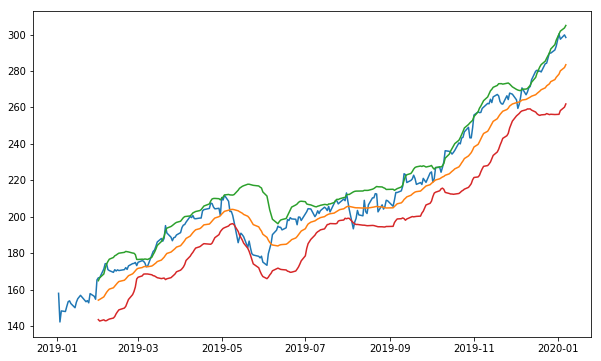

In [10]:
# Bollinger Bands - Volatility
aapl['std'] = aapl['Close'].rolling(21).std()
plt.plot(aapl['Close'])
plt.plot(aapl['21-day'])
plt.plot(aapl['21-day']+2*aapl['std'])
plt.plot(aapl['21-day']-2*aapl['std'])

In [11]:
import ta

#### RSI-Volatility

In [12]:
aapl['rsi'] = ta.momentum.rsi(aapl['Close'],14)

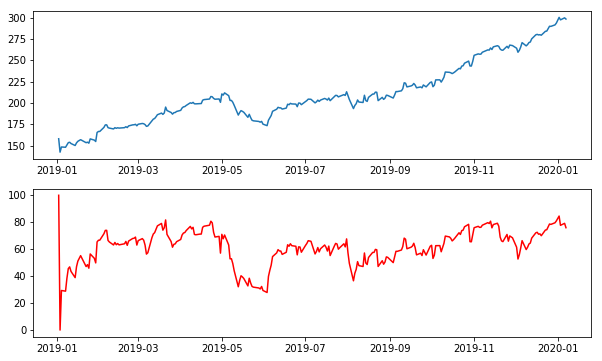

In [13]:
fig,axes=plt.subplots(2,1)
axes[0].plot(aapl.Close)
axes[1].plot(aapl.rsi,'r')

In [14]:
help(ta)

Help on package ta:

NAME
    ta

DESCRIPTION
    It is a technical analysis library to financial time series datasets.
    You can use it to do feature engineering from financial datasets. It is
    builded on pandas python library.
    
    .. moduleauthor:: Dario Lopez Padial (Bukosabino)

PACKAGE CONTENTS
    momentum
    others
    trend
    utils
    volatility
    volume
    wrapper

FILE
    /Users/anthonyplata/anaconda3/lib/python3.7/site-packages/ta/__init__.py


